In [133]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('./data/forecasting_dataset(2013-2030).csv', encoding='utf-8')

In [136]:
df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,103.0,강원특별자치도,강릉시,2010,172529.848156,33.574456,29.141666,1295.201743,1139.809640,854.630988,390.616499,43102.0,138647.706678,강원특별자치도 강릉시
1,326.0,강원특별자치도,강릉시,2011,171864.759096,33.496664,29.081064,1315.746915,1148.878526,900.342471,392.440671,41960.0,138842.997822,강원특별자치도 강릉시
2,549.0,강원특별자치도,강릉시,2012,171813.676743,33.146726,29.081064,1291.151358,1188.866179,872.236317,379.217725,41589.0,139178.400470,강원특별자치도 강릉시
3,772.0,강원특별자치도,강릉시,2013,171264.099345,33.090525,29.024862,1152.655549,1175.665470,814.170412,418.698755,40758.0,139269.307494,강원특별자치도 강릉시
4,995.0,강원특별자치도,강릉시,2014,170406.212553,33.851127,29.024862,1037.433829,1222.644599,786.927027,379.316647,39345.0,139545.910056,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,4134.0,충청북도,충주시,2028,185790.000000,39.000000,30.000000,445.000000,2609.000000,691.000000,401.000000,29131.0,163963.000000,충청북도 충주시
5102,4357.0,충청북도,충주시,2029,185863.000000,39.000000,30.000000,387.000000,2636.000000,691.000000,401.000000,29190.0,164576.000000,충청북도 충주시
5103,4580.0,충청북도,충주시,2030,185928.000000,39.000000,30.000000,329.000000,2654.000000,691.000000,401.000000,29241.0,165156.000000,충청북도 충주시
5104,4802.0,충청북도,충주시,2031,185985.000000,39.000000,30.000000,271.000000,2667.000000,691.000000,401.000000,29285.0,165705.000000,충청북도 충주시


In [137]:
data = df

In [138]:
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

In [139]:
df['행정구역'].value_counts()

행정구역
강원특별자치도 강릉시    23
인천광역시 계양구      23
서울특별시 용산구      23
서울특별시 은평구      23
서울특별시 종로구      23
               ..
경상북도 영덕군       23
경상북도 영양군       23
경상북도 영주시       23
경상북도 영천시       23
충청북도 충주시       23
Name: count, Length: 222, dtype: int64

In [140]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

In [141]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2013) & (df['연도'] <= 2020)]

# 결과 출력
print(filtered_df)

      Unnamed: 0 행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수  \
3          772.0  강원특별자치도       강릉시  2013  0.163247  0.182776  0.287642   
4          995.0  강원특별자치도       강릉시  2014  0.162384  0.187907  0.287642   
5         1218.0  강원특별자치도       강릉시  2015  0.161329  0.200750  0.287642   
6         1441.0  강원특별자치도       강릉시  2016  0.160653  0.170314  0.287642   
7         1664.0  강원특별자치도       강릉시  2017  0.160617  0.169789  0.287642   
...          ...      ...       ...   ...       ...       ...       ...   
5089      1458.0     충청북도       충주시  2016  0.176557  0.234604  0.338771   
5090      1681.0     충청북도       충주시  2017  0.176712  0.234406  0.338384   
5091      1904.0     충청북도       충주시  2018  0.178372  0.238759  0.338540   
5092      2127.0     충청북도       충주시  2019  0.178676  0.227790  0.330922   
5093      2350.0     충청북도       충주시  2020  0.178442  0.227121  0.322724   

          출생건수      사망건수      혼인건수      이혼건수   학령인구(명)   총인구수-학령인구(명)  \
3     0.151716  0.110638  

In [142]:
filtered_df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
3,772.0,강원특별자치도,강릉시,2013,0.163247,0.182776,0.287642,0.151716,0.110638,0.145357,0.214152,0.166624,139269.307494,강원특별자치도 강릉시
4,995.0,강원특별자치도,강릉시,2014,0.162384,0.187907,0.287642,0.140228,0.115289,0.141337,0.194706,0.160827,139545.910056,강원특별자치도 강릉시
5,1218.0,강원특별자치도,강릉시,2015,0.161329,0.200750,0.287642,0.147171,0.117112,0.139637,0.195085,0.153690,139847.434158,강원특별자치도 강릉시
6,1441.0,강원특별자치도,강릉시,2016,0.160653,0.170314,0.287642,0.134609,0.116467,0.132618,0.189079,0.147570,140346.082585,강원특별자치도 강릉시
7,1664.0,강원특별자치도,강릉시,2017,0.160617,0.169789,0.287642,0.121973,0.115260,0.132662,0.181605,0.142102,141355.431801,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,1458.0,충청북도,충주시,2016,0.176557,0.234604,0.338771,0.165981,0.131653,0.151476,0.220738,0.142692,153458.336526,충청북도 충주시
5090,1681.0,충청북도,충주시,2017,0.176712,0.234406,0.338384,0.149481,0.137028,0.152142,0.214859,0.137475,154646.358183,충청북도 충주시
5091,1904.0,충청북도,충주시,2018,0.178372,0.238759,0.338540,0.141487,0.138010,0.156362,0.223467,0.134185,157018.832202,충청북도 충주시
5092,2127.0,충청북도,충주시,2019,0.178676,0.227790,0.330922,0.135946,0.137861,0.141358,0.223235,0.129566,158274.737060,충청북도 충주시


In [143]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [144]:
sequence_length = 4  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [145]:
sequences.shape

(888, 5, 8)

In [146]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [147]:
# 훈련/검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [149]:
import numpy as np
import tensorflow as tf
import random as python_random

# 시드 값 설정
np.random.seed(1)
python_random.seed(1)
tf.random.set_seed(1)

In [150]:
model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [151]:

# early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습

model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100


18/18 [==============================] - 1s 51ms/step - loss: 0.0553 - val_loss: 0.0078
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 0.0114 - val_loss: 0.0079
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/100
18/18 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/100
18/18 [==============================] - 1s 33ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 9/100
18/18 [==============================] - 1s 34ms/step - loss: 8.9920e-04 - val_loss: 0.0011
Epoch 10/100
18/18 [==============================] - 1s 33ms/step - loss: 7.8164e-04 - val_loss: 9.7482e-04

In [152]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

6/6 [==============================] - 0s 16ms/step


/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

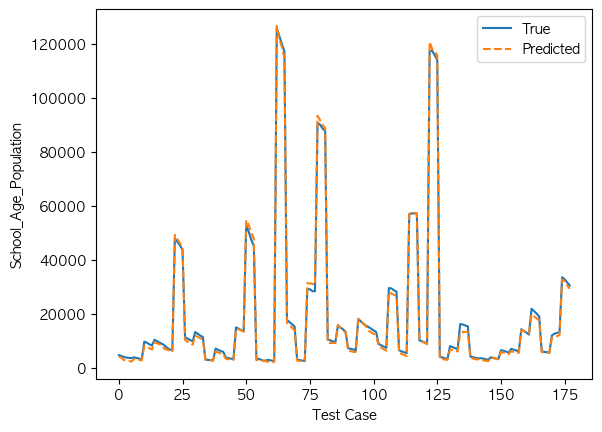

Mean Squared Error: 1286819.48
Mean Absolute Percentage Error (MAPE): 8.62%


In [153]:
# 예측
predicted_data = model.predict(X_test)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

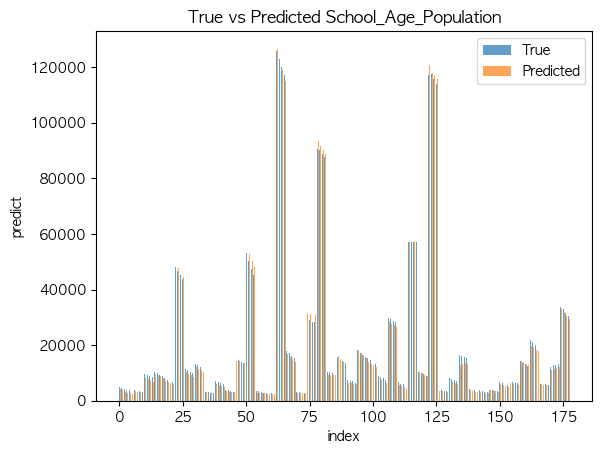

In [154]:
# 결과 시각화 (barplot)
bar_width = 0.35
index = np.arange(len(y_true))

plt.bar(index, y_true.flatten(), bar_width, label='True', alpha=0.7)
plt.bar(index + bar_width, predicted_data.flatten(), bar_width, label='Predicted', alpha=0.7, linestyle='--')

plt.xlabel('index')
plt.ylabel('predict')
plt.title('True vs Predicted School_Age_Population')
plt.legend()
plt.show()

In [155]:
for yt, pr in zip(y_true, predicted_data):
    print(yt, pr)

[4759.] [4240.]
[4509.] [3869.]
[4079.] [2977.]
[3907.] [2796.]
[3742.] [2621.]
[3719.] [2427.]
[3962.] [3355.]
[3761.] [3185.]
[3514.] [2981.]
[3271.] [2848.]
[9790.] [8182.]
[9377.] [7842.]
[8807.] [7365.]
[8355.] [6863.]
[10502.] [9581.]
[9989.] [9200.]
[9401.] [8786.]
[8984.] [8337.]
[8328.] [7018.]
[7451.] [6803.]
[6896.] [6439.]
[6630.] [5921.]
[47957.] [49276.]
[46724.] [47772.]
[45374.] [46145.]
[43824.] [44615.]
[11467.] [10395.]
[10893.] [9747.]
[10413.] [9180.]
[9916.] [8680.]
[13331.] [12095.]
[12711.] [11538.]
[12007.] [11055.]
[11498.] [10442.]
[3127.] [3114.]
[3035.] [2981.]
[2913.] [2895.]
[2858.] [2795.]
[7226.] [6169.]
[6719.] [5801.]
[6342.] [5421.]
[6025.] [5029.]
[3896.] [3449.]
[3728.] [3279.]
[3496.] [3134.]
[3312.] [2970.]
[15067.] [14425.]
[14603.] [14385.]
[14046.] [14023.]
[13591.] [13511.]
[53055.] [54772.]
[50394.] [52939.]
[47494.] [50138.]
[45195.] [47932.]
[3499.] [2922.]
[3366.] [2909.]
[3048.] [2883.]
[2625.] [2696.]
[2932.] [2434.]
[2985.] [2308.]
[27

In [156]:
prediction_df = df[df['연도'].isin([i for i in range(2018, 2030)])]

In [157]:
prediction_df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
8,1887.0,강원특별자치도,강릉시,2018,0.159737,0.169380,0.287642,0.118261,0.126677,0.127294,0.177732,0.137056,141452.610739,강원특별자치도 강릉시
9,2110.0,강원특별자치도,강릉시,2019,0.159956,0.160546,0.278905,0.112989,0.128424,0.128425,0.202090,0.132803,142526.336192,강원특별자치도 강릉시
10,2333.0,강원특별자치도,강릉시,2020,0.159786,0.165372,0.286951,0.111543,0.128517,0.117525,0.171973,0.126133,143600.893858,강원특별자치도 강릉시
11,2556.0,강원특별자치도,강릉시,2021,0.159321,0.164661,0.286254,0.106990,0.129205,0.116885,0.172939,0.121485,144026.862442,강원특별자치도 강릉시
12,2779.0,강원특별자치도,강릉시,2022,0.158113,0.163202,0.294300,0.106473,0.157406,0.105503,0.166404,0.115787,143900.127727,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,3465.0,충청북도,충주시,2025,0.177571,0.222646,0.310345,0.098508,0.233716,0.127184,0.205413,0.117970,161906.000000,충청북도 충주시
5099,3688.0,충청북도,충주시,2026,0.177675,0.222646,0.298851,0.092725,0.242526,0.127331,0.205413,0.118335,162630.000000,충청북도 충주시
5100,3911.0,충청북도,충주시,2027,0.177767,0.222646,0.298851,0.086942,0.248466,0.127184,0.205413,0.118651,163315.000000,충청북도 충주시
5101,4134.0,충청북도,충주시,2028,0.177849,0.222646,0.298851,0.081159,0.252524,0.127184,0.205413,0.118930,163963.000000,충청북도 충주시


In [158]:
# 시퀀스 데이터 생성
def create_sequence_data1(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2021, 2031)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [159]:
X_sequences, r, y = create_sequence_data1(prediction_df, sequence_length)

In [160]:
X_sequences

array([[[0.15973666, 0.16938042, 0.2876421 , ..., 0.12729441,
         0.17773248, 0.13705632],
        [0.1599558 , 0.16054578, 0.278905  , ..., 0.12842513,
         0.20209043, 0.13280253],
        [0.15978593, 0.16537197, 0.28695097, ..., 0.11752452,
         0.17197342, 0.12613267],
        [0.15932111, 0.16466083, 0.2862544 , ..., 0.11688535,
         0.17293854, 0.12148509]],

       [[0.1599558 , 0.16054578, 0.278905  , ..., 0.12842513,
         0.20209043, 0.13280253],
        [0.15978593, 0.16537197, 0.28695097, ..., 0.11752452,
         0.17197342, 0.12613267],
        [0.15932111, 0.16466083, 0.2862544 , ..., 0.11688535,
         0.17293854, 0.12148509],
        [0.15811268, 0.16320225, 0.29430037, ..., 0.10550334,
         0.16640432, 0.1157874 ]],

       [[0.15978593, 0.16537197, 0.28695097, ..., 0.11752452,
         0.17197342, 0.12613267],
        [0.15932111, 0.16466083, 0.2862544 , ..., 0.11688535,
         0.17293854, 0.12148509],
        [0.15811268, 0.16320225, 0.2

In [161]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U12')

In [162]:
X_sequences[1]

array([[0.1599558 , 0.16054578, 0.278905  , 0.11298924, 0.12842378,
        0.12842513, 0.20209043, 0.13280253],
       [0.15978593, 0.16537197, 0.28695097, 0.11154317, 0.12851738,
        0.11752452, 0.17197342, 0.12613267],
       [0.15932111, 0.16466083, 0.2862544 , 0.10698979, 0.12920474,
        0.11688535, 0.17293854, 0.12148509],
       [0.15811268, 0.16320225, 0.29430037, 0.10647303, 0.15740627,
        0.10550334, 0.16640432, 0.1157874 ]])

In [163]:
# 예측
predicted_data = model.predict(X_sequences)

 1/63 [..............................] - ETA: 1s

63/63 [==============================] - 1s 8ms/step


In [164]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [165]:
predicted_data.round()

array([[27404.],
       [25887.],
       [24830.],
       ...,
       [18220.],
       [17555.],
       [17123.]])

In [166]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

ValueError: All arrays must be of the same length

In [ ]:
predicted_df

,연도,행정구역,학령인구(명)
0,2021,강원특별자치도 강릉시,30480.0
1,2022,강원특별자치도 강릉시,29955.0
2,2023,강원특별자치도 강릉시,29629.0
3,2024,강원특별자치도 강릉시,29485.0
4,2025,강원특별자치도 강릉시,29407.0
...,...,...,...
2235,2026,충청북도 충주시,29059.0
2236,2027,충청북도 충주시,28959.0
2237,2028,충청북도 충주시,28838.0
2238,2029,충청북도 충주시,28736.0


In [ ]:
predicted_df.to_csv('./data/predicted_school_age_population(2021-2030).csv', encoding='utf-8', index=False)